<a href="https://colab.research.google.com/github/BaijuThomasAV/Sandbox/blob/main/MR_Solution_sanbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [ ]:
# Define function to calculate P&L components
def calculate_pnl(delta, gamma, theta, vega, volga, vanna, cross_gamma, spot_price_day1, spot_price_day2, dsigma, dt, relative_difference=False):
    # Calculate dS based on the relative or absolute difference
    if relative_difference:
        dS = (spot_price_day1 / spot_price_day2) - 1  # Relative difference (percentage change)
        # For FX
        ##dS = (spot_price_day2 / spot_price_day1) - 1  # Relative difference (percentage change)
    else:
        dS = spot_price_day1 - spot_price_day2  # Absolute difference

    # Calculate each P&L component
    delta_pnl = delta * dS
    gamma_pnl = 0.5 * gamma * (dS ** 2)
    theta_pnl = theta * dt
    vega_pnl = vega * dsigma
    volga_pnl = 0.5 * volga * (dsigma ** 2)
    vanna_pnl = vanna * dS * dsigma

    # Cross Gamma P&L: accounts for interaction between spot price and volatility changes
    cross_gamma_pnl = cross_gamma * dS * dsigma

    # Output each P&L component
    print(f"Delta P&L: {delta_pnl:.2f}")
    print(f"Gamma P&L: {gamma_pnl:.2f}")
    print(f"Theta P&L: {theta_pnl:.2f}")
    print(f"Vega P&L: {vega_pnl:.2f}")
    print(f"Volga P&L: {volga_pnl:.2f}")
    print(f"Vanna P&L: {vanna_pnl:.2f}")
    print(f"Cross Gamma P&L: {cross_gamma_pnl:.2f}")

    # Calculate and return total P&L
    total_pnl = delta_pnl + gamma_pnl + theta_pnl + vega_pnl + volga_pnl + vanna_pnl + cross_gamma_pnl
    print(f"Total P&L: {total_pnl:.2f}")
    return total_pnl

#  input parameters
delta_previous = -155849.20
gamma_previous = 48.35
theta_previous = -9.7
vega_previous = 7
volga_previous = 3.50  #  input  volga
vanna_previous = 68.36  #  input vanna
cross_gamma_previous = 0.05  #  input cross-gamma
spot_price_day1 = 104.57
spot_price_day2 = 102.87
dsigma_input = 0.38  # Solution needs - Vega Current MD - Vega Previous MD)
dt_input = 1 / 365  # Input change in time (1 day)

# Call the function with absolute difference
print("Using Absolute Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=False)

# Call the function with relative difference
print("\nUsing Relative Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=True)

# Output statements
print("\nAsset Class Delta Explanation:")
print("1) Interest Rate (IR) Delta: Uses absolute basis point change.")
print("2) Credit/Repo Delta: Uses absolute basis point change.")
print("3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)")
print("4) Equity Delta: Uses relative price change.")
print("5) Commodity Delta: Uses relative price change.")
print("6) Vega and Volga is always Absolute change for all asset class.")
print("7) Theta change - TBD.")
print("8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)")
print("8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and the logic of the Diff values will follow the same as the above asset class rules of Relative vs Absolute  # in solution also drag and drop Risk Factor secondary)")
print("8) Vanna MDX saved in training file)")
print("9) Cross_gamma- TBD)")
print("10) Note: For Taylor VaR, we asks for the shifts and not the prices so the above market data related to dS and dsigma is supplied as Shifts from the client and client can decide relative Vs Absolute)")


Using Absolute Difference:
Delta P&L: -264943.64
Gamma P&L: 69.87
Theta P&L: -0.03
Vega P&L: 2.66
Volga P&L: 0.25
Vanna P&L: 44.16
Cross Gamma P&L: 0.03
Total P&L: -264826.70

Using Relative Difference:
Delta P&L: -2575.52
Gamma P&L: 0.01
Theta P&L: -0.03
Vega P&L: 2.66
Volga P&L: 0.25
Vanna P&L: 0.43
Cross Gamma P&L: 0.00
Total P&L: -2572.20

Asset Class Delta Explanation:
1) Interest Rate (IR) Delta: Uses absolute basis point change.
2) Credit/Repo Delta: Uses absolute basis point change.
3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)
4) Equity Delta: Uses relative price change.
5) Commodity Delta: Uses relative price change.
6) Vega and Volga is always Absolute change for all asset class.
7) Theta change - TBD.
8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)
8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's set

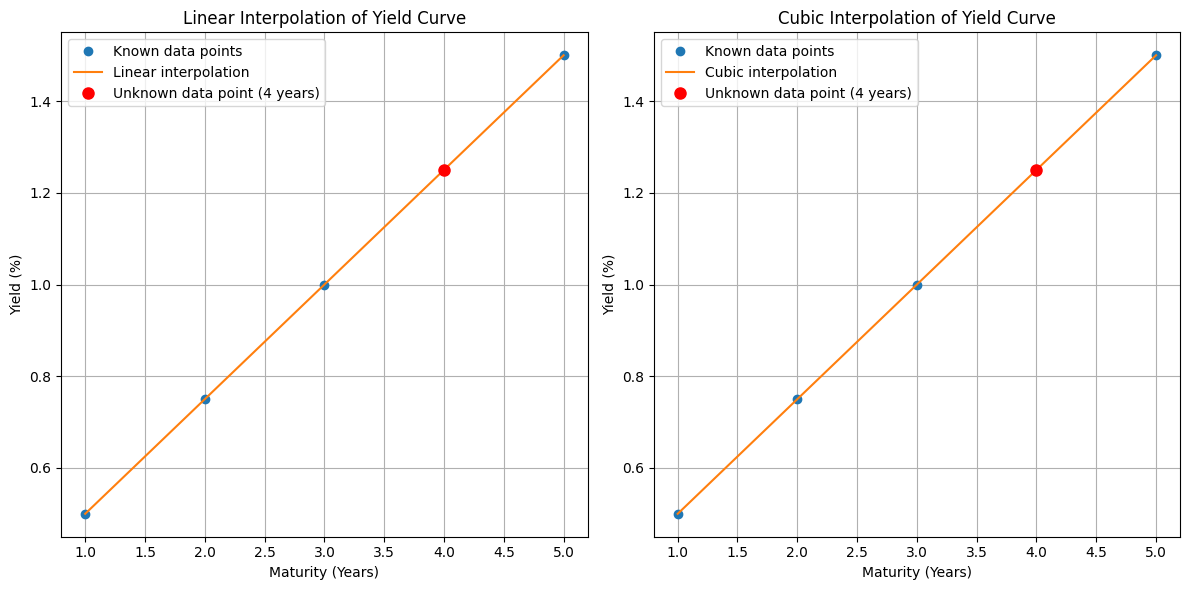

In [ ]:
##InterpolationMode.LINEAR

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points (maturities and yields)
maturities = np.array([1, 2, 3, 5])  # maturities in years
yields = np.array([0.5, 0.75, 1.0, 1.5])  # yields in percentage

# Unknown data point at 4 years
unknown_maturity = 4  # 4 years maturity (unknown)
unknown_yield = 1.25  # Arbitrary yield for visualization purposes

# Create linear and cubic interpolators excluding the unknown data point
linear_interpolator = interp1d(maturities, yields, kind='linear')
cubic_interpolator = interp1d(maturities, yields, kind='cubic')

# Create data for plotting
maturities_full = np.linspace(1, 5, 100)
yields_full_linear = linear_interpolator(maturities_full)
yields_full_cubic = cubic_interpolator(maturities_full)

# Plot side by side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Linear Interpolation
ax1.plot(maturities, yields, 'o', label='Known data points')
ax1.plot(maturities_full, yields_full_linear, '-', label='Linear interpolation')
ax1.plot(unknown_maturity, unknown_yield, 'ro', label='Unknown data point (4 years)', markersize=8)  # Unknown point
ax1.set_title('Linear Interpolation of Yield Curve')
ax1.set_xlabel('Maturity (Years)')
ax1.set_ylabel('Yield (%)')
ax1.legend()
ax1.grid(True)

# Cubic Interpolation
ax2.plot(maturities, yields, 'o', label='Known data points')
ax2.plot(maturities_full, yields_full_cubic, '-', label='Cubic interpolation')
ax2.plot(unknown_maturity, unknown_yield, 'ro', label='Unknown data point (4 years)', markersize=8)  # Unknown point
ax2.set_title('Cubic Interpolation of Yield Curve')
ax2.set_xlabel('Maturity (Years)')
ax2.set_ylabel('Yield (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


Estimated Implied Volatility for Maturity=1.0 years, Tenor=45 days, Moneyness=1.05: 19.50%


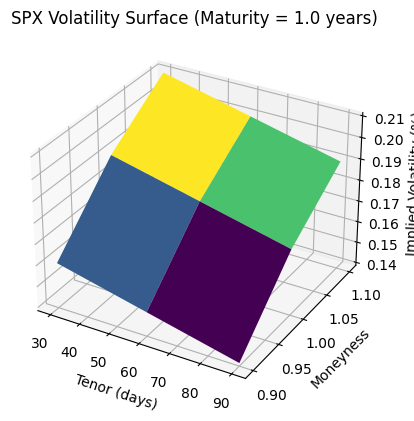

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Simulated SPX Options Data: Maturities (years), Tenors (days), and Implied Volatility (%)
maturities = np.array([0.5, 1.0, 1.5])  # Example maturities in years
tenors = np.array([30, 60, 90])  # Example tenors in days (short, medium, long term)
moneynesses = np.array([0.9, 1.0, 1.1])  # Moneyness levels (ITM, ATM, OTM)

# Simulated volatility surface data (random values for illustration)
vol_surface = np.array([
    [[0.15, 0.18, 0.20], [0.14, 0.17, 0.19], [0.13, 0.16, 0.18]],  # For maturity = 0.5 years
    [[0.16, 0.19, 0.21], [0.15, 0.18, 0.20], [0.14, 0.17, 0.19]],  # For maturity = 1.0 years
    [[0.17, 0.20, 0.22], [0.16, 0.19, 0.21], [0.15, 0.18, 0.20]]   # For maturity = 1.5 years
])

# Create trilinear interpolator using RegularGridInterpolator
interpolator = RegularGridInterpolator((maturities, tenors, moneynesses), vol_surface)

# Example interpolation at specific points
interpolation_point = [1.0, 45, 1.05]  # Maturity = 1.0 years, Tenor = 45 days, Moneyness = 1.05 (slightly OTM)
estimated_volatility = interpolator(interpolation_point)

# Output interpolated result (convert numpy array to scalar using .item())
print(f"Estimated Implied Volatility for Maturity={interpolation_point[0]} years, "
      f"Tenor={interpolation_point[1]} days, Moneyness={interpolation_point[2]}: "
      f"{estimated_volatility.item():.2%}")

# Visualizing a slice of the 3D cube (e.g., for a fixed maturity of 1.0 years)
tenor_grid, moneyness_grid = np.meshgrid(tenors, moneynesses)

# Extracting the slice for maturity = 1.0 years (index 1)
vol_slice = vol_surface[1]  # 2D slice for maturity = 1.0

# Plotting the 2D slice
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tenor_grid, moneyness_grid, vol_slice.T, cmap='viridis')

ax.set_xlabel('Tenor (days)')
ax.set_ylabel('Moneyness')
ax.set_zlabel('Implied Volatility (%)')
ax.set_title('SPX Volatility Surface (Maturity = 1.0 years)')

plt.show()


